# Uygulama Notları: 10
## FİZ220 - Bilgisayar Programlama II | 12/06/2020

**Yüklü parçacıkların etkileşim simülasyonu**

* Giriş ya da "büyük kapanış"
* Coulomb Yasası
* Newton'ın 2. Yasası
* En basitinden başlayalım: İki cisim problemi
* Üç cisim
  * Çerçevenin boyutlarını belirlemek
* ÇEPEÇEVRE!
    * Ya dışındasındır çemberin, ya da içinde yer alacaksın...
* Pek de söylenmeyenler
    * Verlet algoritması
    * Parçacıklar yüklü değilse, ya da üstüne başka bir şeyse?
* Ödev değil ama canınız çok sıkılırsa yapacak bir şey bulamazsanız filan...
* Son söz...


Dr. Emre S. Taşcı, emre.tasci@hacettepe.edu.tr  
Fizik Mühendisliği Bölümü  
Hacettepe Üniversitesi

# Giriş ya da "büyük kapanış"
Bu son dersimizde, öğrendiğimiz şeyleri birleştirip, birbirleri ve çevreleriyle etkileşen yüklü parçacıkların moleküler dinamik simülasyonunu bir araya getireceğiz. Tabii fizik olmadan olmaz.

# Coulomb Yasası
Aralarında $r$ mesafe bulunan $q_1,\,q_2$ yükleri vakum ortamında birbirleri ile Coulomb yasası uyarınca şu şekilde tanımlanan bir kuvvetle etkileşirler:

$$ \vec{F} = \frac{1}{4\pi\epsilon_0}\frac{q_1 q_2}{r^2}\hat{r},\quad\epsilon_0 = 8.854\times10^{-12}\,\text{F/m}\leftrightarrow  k\equiv\frac{1}{4\pi\epsilon_0} = 9\times10^9\text{Nm}^2\text{/C}^2$$

$\hat{r}$ birim vektörü, iki yüklü parçacığı birleştiren doğru üzerinde bulunan, kuvvetin yönünü belirten vektördür (yani, aynı işaretli yükler birbirlerini kendilerini birleştiren doğru boyunca iterlerken, zıt işaretli yükler birbirlerini kendilerini birleştiren doğru boyunca iterler). Newton'ın 3. yasası uyarınca, iki yük birbirini zıt yönde fakat aynı büyüklükteki kuvvetle etkilerler:

$$\vec{F}_{12} = -\vec{F}_{21}$$

# Newton'ın 2. Yasası
Newton'ın 2. yasası uyarınca, bir cisim üzerine etki eden kuvvet, kütlesi ile orantılı olarak ona kuvvet yönünde ivme kazandırır:
$$\vec{F}=m\vec{a}$$

# En basitinden başlayalım: İki cisim problemi
Elimizde $\vec{r}_1$ ve $\vec{r}_2$ pozisyon vektörleriyle konumları belirtilmiş, $q_1$ ve $q_2$ yükleri olsun, mesela şöyle:

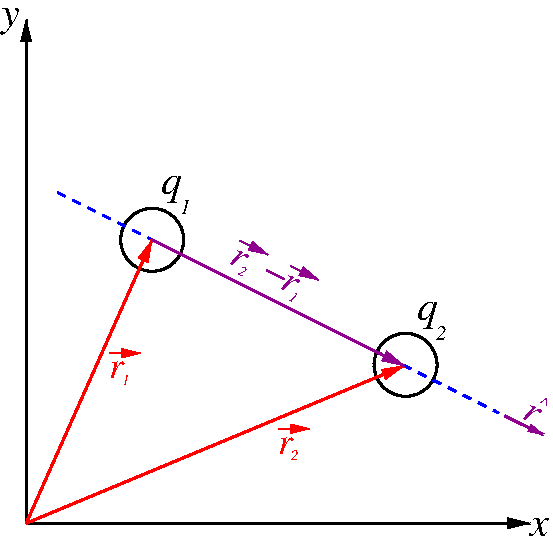

Değişkenlerimize değerler verip, bilgisayarda aralarındaki kuvveti hesaplayalım:

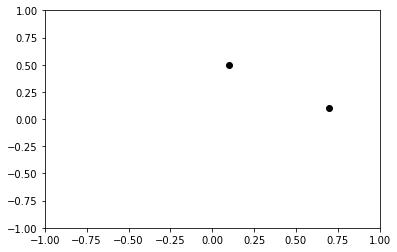

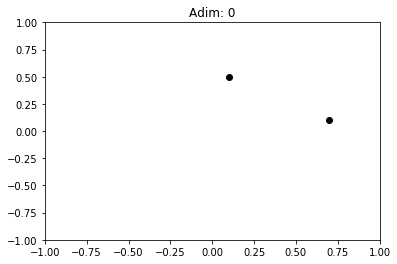

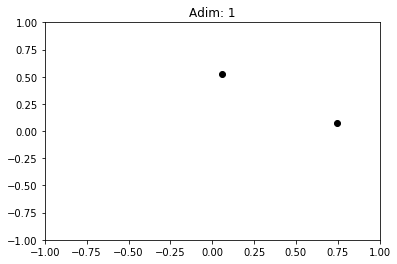

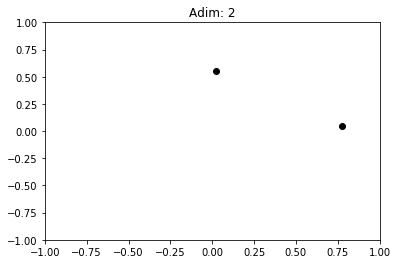

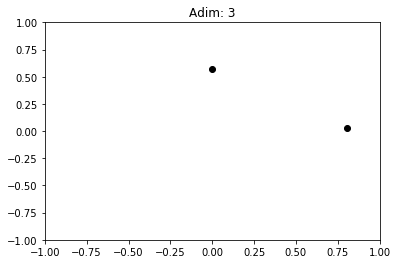

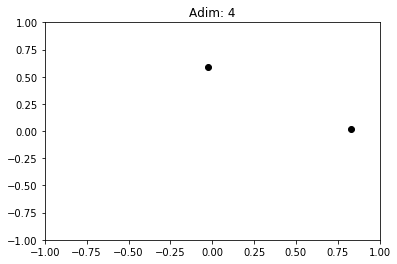

[[[ 5.67973886e-02  5.28801741e-01]
  [ 7.43202611e-01  7.11982590e-02]]

 [[ 2.37869464e-02  5.50808702e-01]
  [ 7.76213054e-01  4.91912976e-02]]

 [[-3.68470629e-03  5.69123138e-01]
  [ 8.03684706e-01  3.08768625e-02]]

 [[-2.75445676e-02  5.85029712e-01]
  [ 8.27544568e-01  1.49702882e-02]]

 [[-4.88156566e-02  5.99210438e-01]
  [ 8.48815657e-01  7.89562286e-04]]]


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 11 20:27:12 2020

@author: sururi
"""

import numpy as np
import matplotlib.pyplot as plt

N = 5 # Simülasyonun toplam adım sayısı

k = 9E9 # Nm^2/C^2 
m = 1 # kg (kütleleri 1 alalım)
Delta_t = 1 # zaman aralığı (s)
# Konum hesabında her seferinde karesini hesaplamamak için
# ayrı bir değişken olarak tanımlıyoruz
Delta_t_kare = Delta_t**2 # s^2

# Her adımda parçacıkların konumlarını 
# konumlar değişkeninde tutacağız.
# konumlar[adım#,parçacık#,{x,y}]
# Örneğin: konumlar(5,1,0) : 2. parçacağın 5. adımdaki x konumu
konumlar = np.empty((N,2,2))

q1 = 3.0E-6 # C
r1 = np.array([1,5])*0.1 # m


q2 = 2.0E-6 # C
r2 = np.array([7,1])*0.1 # m

plt.plot([r1[0],r2[0]],[r1[1],r2[1]],"ok")
##plt.arrow(0,0,r1[0],r1[1],length_includes_head=True,head_width=.3, head_length=.5)
##plt.arrow(0,0,r2[0],r2[1],length_includes_head=True,head_width=.3, head_length=.5)
##plt.arrow(r1[0],r1[1],r2[0]-r1[0],r2[1]-r1[1],length_includes_head=True,head_width=.3, head_length=.5,color="purple")
##plt.xlim(0,0.1)
##plt.ylim(0,0.1)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()



for adim in range(N):
    r = r2-r1
    r_n = np.linalg.norm(r) # aradaki mesafe (m)


    plt.plot([r1[0],r2[0]],[r1[1],r2[1]],"ok")
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title("Adim: {:d}".format(adim))
    plt.show()



    # Kuvvetin büyüklüğü (1'in 2'ye yaptigi: F_21)
    F_n = k*q1*q2/r_n**2 # N
    ##print(F_n)

    # Kuvvetin bileşenleri
    aci = np.arctan2(r[1],r[0]) # r vektörünün x-ekseniyle yaptığı açı (radyan)
    ##print(np.rad2deg(aci))
    F_x = F_n*np.cos(aci)
    F_y = F_n*np.sin(aci)
    F = np.array([F_x,F_y])
    ##print(F)

    # İvmeyi de bulalım
    a = F/m # m/s^2
    ##print(a)

    # 2'nin üzerine binen kuvvet sonucu kazandığı bu ivme ile 
    # Delta_t süre sonra ne kadar yol kat etmiş olacağını hesaplayalım:
    Delta_x = 0.5*a[0]*Delta_t_kare
    Delta_y = 0.5*a[1]*Delta_t_kare
    Delta_xy = np.array([Delta_x,Delta_y])
    ##print("Delta_xy: ", Delta_xy)

    r2 = r2 + Delta_xy

    # 1'in kat edeceği yol da 2'ninkinin tam tersi yönde, aynı büyüklükte olacak:
    r1 = r1 - Delta_xy
    
    ##print(r1)
    ##print(r2)
    
    konumlar[adim,0,0] = r1[0]
    konumlar[adim,0,1] = r1[1]
    konumlar[adim,1,0] = r2[0]
    konumlar[adim,1,1] = r2[1]
print(konumlar)

# Üç cisim
İki parçacık için sistemimiz işliyor (çünkü yükler arasındaki etkileşim _sen bana, ben sana_ şeklinde ilerliyor) ama üç parçacık için biraz düşünmek gerekiyor: bir nimet olarak süperpozisyon ilkesi geçerli ne mutlu ki (böylelikle etkileşimleri ikili ikili ele alıp, toplayabiliriz) ama yine de her bir parçacığa diğerlerinin etki ettirdiği kuvveti hesaba katmamız gerekiyor.

Bunu iki yoldan yapabiliriz. Her aşamada iki parçacığı ele alacağımız için birine $i$, diğerine de $j$ parçacığı diyelim:

In [81]:
P = 3 # parçacık sayısı

# kimin, kiminle etkileşimini hesaplayacağız?
for i in range(P):
    for j in range(P):
        print("{:d}. parçacığın {:d}. parçacığa etkisini hesaplayalım.".format(i,j))
    print("-"*45)

0. parçacığın 0. parçacığa etkisini hesaplayalım.
0. parçacığın 1. parçacığa etkisini hesaplayalım.
0. parçacığın 2. parçacığa etkisini hesaplayalım.
---------------------------------------------
1. parçacığın 0. parçacığa etkisini hesaplayalım.
1. parçacığın 1. parçacığa etkisini hesaplayalım.
1. parçacığın 2. parçacığa etkisini hesaplayalım.
---------------------------------------------
2. parçacığın 0. parçacığa etkisini hesaplayalım.
2. parçacığın 1. parçacığa etkisini hesaplayalım.
2. parçacığın 2. parçacığa etkisini hesaplayalım.
---------------------------------------------


Bu yaklaşımda iki adet ciddi sorun var: öncelikle bir parçacığın kendisiyle etkileşimini de alıyor ki, "parçacıklar" arasındaki mesafe 0 olur ve Coulomb denklemi patlar; ikinci olarak da, mesela 1.'nin 2.'yle etkileşimini hesaplıyor, sonra sıra 2.'ye geldiğinde oturup bir daha hesaplıyor (halbuki yönü zıt, büyüklüğü aynı!).

Neyse ki, bu sorunları, yine 2 döngü (ve bu sefer ek olarak, kafamızı) kullanarak halledebiliriz:

In [82]:
P = 3 # parçacık sayısı

# kimin, kiminle etkileşimini hesaplayacağız?
for i in range(P):
    for j in range(i+1,P):
        print("{:d}. parçacığın {:d}. parçacığa etkisini hesaplayalım.".format(i,j))
    print("-"*45)

0. parçacığın 1. parçacığa etkisini hesaplayalım.
0. parçacığın 2. parçacığa etkisini hesaplayalım.
---------------------------------------------
1. parçacığın 2. parçacığa etkisini hesaplayalım.
---------------------------------------------
---------------------------------------------


Kendi küçük, yaptığı iş büyük! Biraz önceki 6+3(!) hesabın yerine sadece 3 hesapla (ve kafamızla) her bir parçacığın üzerine binen kuvveti hesapladık. İşleri biraz daha sistematik, genelleştirilmiş ve düzenli yapmak adına, tek tek q1, q2, q3; r1, r2, r3, vs. diye yazmak yerine, bu değerlerimizi vektör ve matrislerde tutalım (yoksa kod hemen hemen aynı kod):

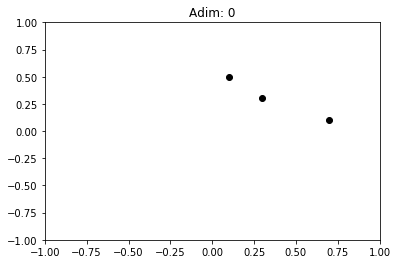

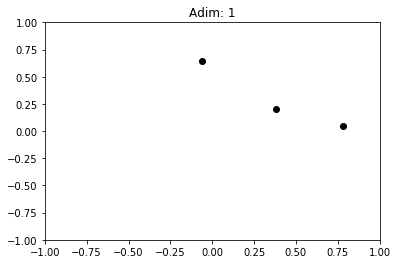

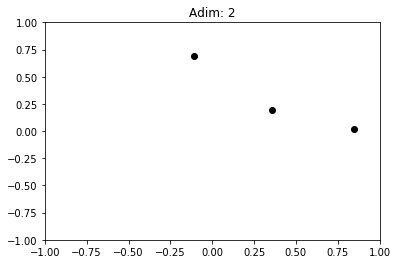

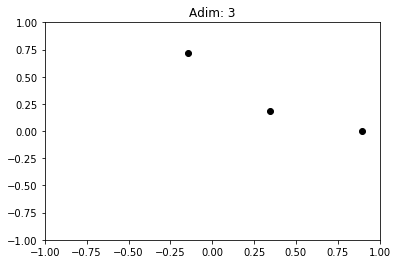

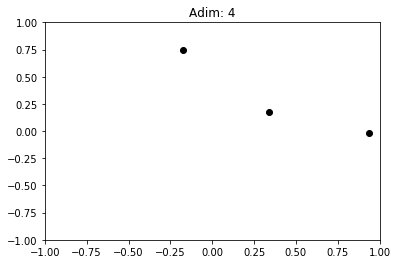

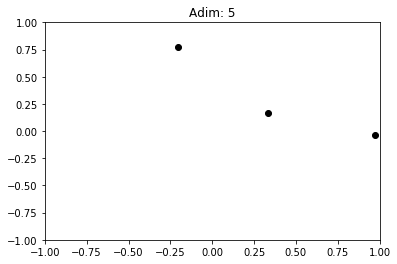

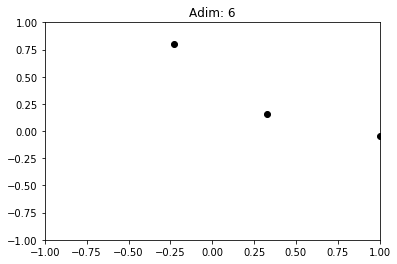

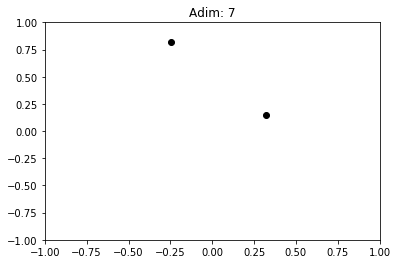

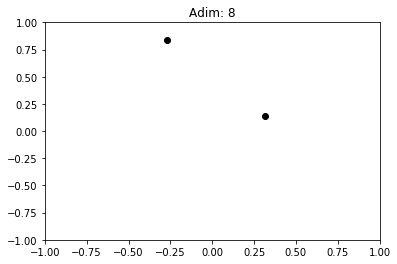

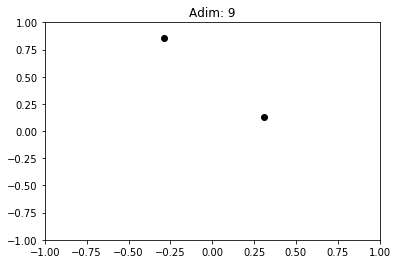

[[[-0.06252688  0.64812601]
  [ 0.78345184  0.05107365]
  [ 0.37907505  0.20080034]]

 [[-0.10710583  0.68696198]
  [ 0.84941825  0.01974592]
  [ 0.35768758  0.19329211]]

 [[-0.14351635  0.71969857]
  [ 0.8969113  -0.00262661]
  [ 0.34660505  0.18292804]]

 [[-0.17457072  0.74816586]
  [ 0.93602276 -0.02075098]
  [ 0.33854796  0.17258512]]

 [[-0.20184562  0.77353706]
  [ 0.96990236 -0.03620037]
  [ 0.33194326  0.16266332]]

 [[-0.22629276  0.79655071]
  [ 1.00009339 -0.04976485]
  [ 0.32619937  0.15321415]]

 [[-0.24853218  0.81769934]
  [ 1.0274997  -0.061912  ]
  [ 0.32103249  0.14421265]]

 [[-0.26899225  0.83732869]
  [ 1.05270741 -0.07294624]
  [ 0.31628484  0.13561755]]

 [[-0.28798248  0.8556916 ]
  [ 1.07612308 -0.08307891]
  [ 0.3118594   0.12738732]]

 [[-0.3057346   0.87297923]
  [ 1.09804261 -0.09246366]
  [ 0.30769199  0.11948443]]]


In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 11 21:26:58 2020

@author: sururi
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

N = 10 # Simülasyonun toplam adım sayısı
P = 3 # Parçacık sayısı

k = 9E9 # Nm^2/C^2 
m = 1 # kg (kütleleri 1 alalım)
Delta_t = 1 # zaman aralığı (s)
# Konum hesabında her seferinde karesini hesaplamamak için
# ayrı bir değişken olarak tanımlıyoruz
Delta_t_kare = Delta_t**2 # s^2
Delta_t_kare_yarim = Delta_t**2*0.5 # s^2

# Her adımda parçacıkların konumlarını 
# konumlar değişkeninde tutacağız.
# konumlar[adım#,parçacık#,{x,y}]
# Örneğin: konumlar(5,1,0) : 2. parçacağın 5. adımdaki x konumu
konumlar = np.zeros((N,P,2))

q = np.array([3.0E-6,2.0E-6,1E-6]) # Yükleri burada tutuyoruz (C)
r = np.array([[1,5],[7,1],[3,3]])*0.1 # Konumlar da burada (m)

for adim in range(N):
    plt.plot(r[:,0],r[:,1],"ok")
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title("Adim: {:d}".format(adim))
    plt.show()

    ivmeler = np.zeros((P,2))
    for i in range(P):
        for j in range(i+1,P):
            r_ij = r[j,:]-r[i,:]
            r_n = np.linalg.norm(r_ij) # m
            
            F_n = k*q[i]*q[j]/r_n**2 # N
            ##print(F_n)
            aci = np.arctan2(r_ij[1],r_ij[0]) # radyan
            F_x = F_n*np.cos(aci)
            ##print("F_x:",F_x)
            F_y = F_n*np.sin(aci)
            F = np.array([F_x,F_y])
            ##print("F:",F)

            a = F/m # m/s^2

            # ilgili parçacığın `ivmeler` matrisine ivmesini yazalım
            ivmeler[j,:] += a
            
            # Diğer parçacık da nasibini zıt yönde alacak
            ivmeler[i,:] -= a

    # Bu adımdaki her bir parçacığın üzerine binen kuvvetleri/ivmeleri 
    # hesapladığımıza göre, şimdi aldıkları yolları bulalım:
    
    # 2'nin üzerine binen kuvvet sonucu kazandığı bu ivme ile 
    # Delta_t süre sonra ne kadar yol kat etmiş olacağını hesaplayalım:
    
    # Bu eski usülde nasıl yaptığımızdı:
    ## Delta_x = 0.5*a[0]*Delta_t_kare
    ## Delta_y = 0.5*a[1]*Delta_t_kare
    ## Delta_xy = np.array([Delta_x,Delta_y])
    
    # ama artık, doğrudan yapabiliriz 
    # (sonuçta bütün ivme değerlerini 0.5*t^2 ile çarpıyoruz)
    Deltalar = ivmeler*Delta_t_kare_yarim
    
    # Deltalar'ı doğrudan r'lere ekleyebiliriz:
    r += Deltalar
    konumlar[adim,:] = r

print(konumlar)

## Çerçevenin boyutlarını belirlemek
Keşke simülasyon boyunca noktaların uğradıkları bütün konumları bilsek de, baştan grafik aralığını o şekilde tanımlayabilsek!.. 

...e ama biliyoruz ki zaten! (`konumlar` matrisi, her adımdaki konumları tutmuyor muydu?!)

O halde, her adımda çizdirmeyi bir kenara bırakıp, bütün işler bittikten sonra, uğranmış maksimum/minimum konumlara göre tanımlayalım sınırlarımızı:


[[[ 0.1         0.5       ]
  [ 0.7         0.1       ]
  [ 0.3         0.3       ]]

 [[-0.06252688  0.64812601]
  [ 0.78345184  0.05107365]
  [ 0.37907505  0.20080034]]

 [[-0.10710583  0.68696198]
  [ 0.84941825  0.01974592]
  [ 0.35768758  0.19329211]]

 [[-0.14351635  0.71969857]
  [ 0.8969113  -0.00262661]
  [ 0.34660505  0.18292804]]

 [[-0.17457072  0.74816586]
  [ 0.93602276 -0.02075098]
  [ 0.33854796  0.17258512]]

 [[-0.20184562  0.77353706]
  [ 0.96990236 -0.03620037]
  [ 0.33194326  0.16266332]]]


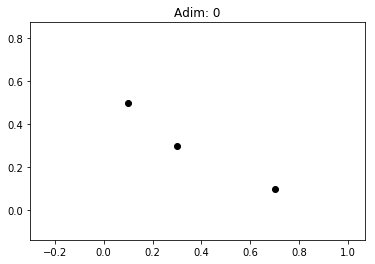

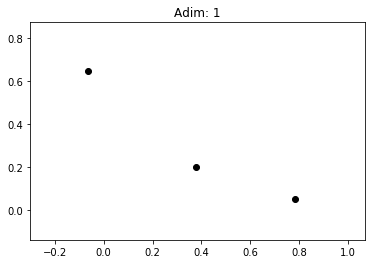

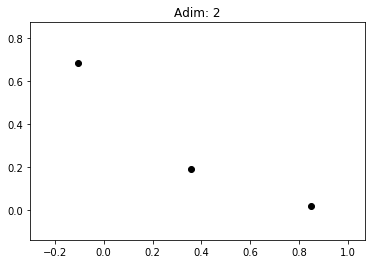

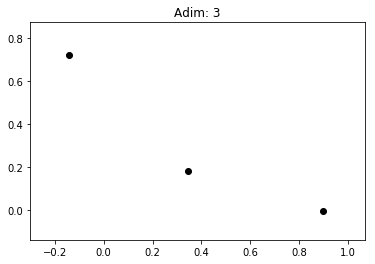

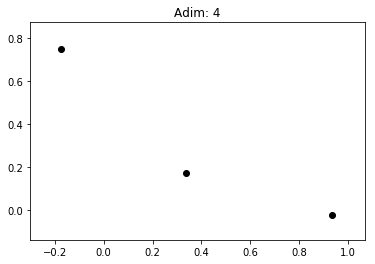

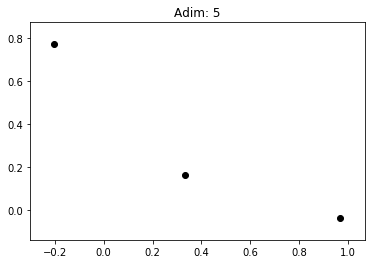

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 11 21:26:58 2020

@author: sururi
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

N = 5 # Simülasyonun toplam adım sayısı

k = 9E9 # Nm^2/C^2 

m = 1 # kg (kütleleri 1 alalım)
Delta_t = 1 # zaman aralığı (s)

# Konum hesabında her seferinde karesini hesaplamamak için
# ayrı bir değişken olarak tanımlıyoruz
Delta_t_kare = Delta_t**2 # s^2
Delta_t_kare_yarim = Delta_t**2*0.5 # s^2

q = np.array([3,2,1])*1E-6 # Yükleri burada tutuyoruz (C)
r = np.array([[1,5],[7,1],[3,3]])*0.1 # Konumlar da burada (m)

P = q.shape[0] # Parçacık sayısı -- satır sayısından buluyoruz

# Her adımda parçacıkların konumlarını 
# konumlar değişkeninde tutacağız.
# konumlar[adım#,parçacık#,{x,y}]
# Örneğin: konumlar(5,1,0) : 2. parçacağın 5. adımdaki x konumu
konumlar = np.zeros((N+1,P,2))
konumlar[0,:] = r

for adim in range(N):
    ivmeler = np.zeros((P,2))
    for i in range(P):
        for j in range(i+1,P):
            r_ij = r[j,:]-r[i,:]
            r_n = np.linalg.norm(r_ij) # m
            
            F_n = k*q[i]*q[j]/r_n**2 # N
            aci = np.arctan2(r_ij[1],r_ij[0]) # radyan
            F_x = F_n*np.cos(aci)
            F_y = F_n*np.sin(aci)
            F = np.array([F_x,F_y])

            a = F/m # m/s^2
            # ilgili parçacığın `ivmeler` matrisine ivmesini yazalım
            ivmeler[j,:] += a
            
            # Diğer parçacık da nasibini zıt yönde alacak
            ivmeler[i,:] -= a

    # Bu adımdaki her bir parçacığın üzerine binen kuvvetleri/ivmeleri 
    # hesapladığımıza göre, şimdi aldıkları yolları bulalım:
    
    # 2'nin üzerine binen kuvvet sonucu kazandığı bu ivme ile 
    # Delta_t süre sonra ne kadar yol kat etmiş olacağını hesaplayalım:
    
    # Bu eski usülde nasıl yaptığımızdı:
    ## Delta_x = 0.5*a[0]*Delta_t_kare
    ## Delta_y = 0.5*a[1]*Delta_t_kare
    ## Delta_xy = np.array([Delta_x,Delta_y])
    
    # ama artık, doğrudan yapabiliriz 
    # (sonuçta bütün ivme değerlerini 0.5*t^2 ile çarpıyoruz)
    Deltalar = ivmeler*Delta_t_kare_yarim
    
    # Deltalar'ı doğrudan r'lere ekleyebiliriz:
    r += Deltalar
    konumlar[adim+1,:] = r

print(konumlar)

x_min = np.min(konumlar[:,:,0])
x_max = np.max(konumlar[:,:,0])
y_min = np.min(konumlar[:,:,1])
y_max = np.max(konumlar[:,:,1])

for adim in range(N+1):
    plt.plot(konumlar[adim,:,0],konumlar[adim,:,1],"ok")

    plt.xlim(x_min-0.1,x_max+0.1)
    plt.ylim(y_min-0.1,y_max+0.1)
    plt.title("Adim: {:d}".format(adim))
    plt.show()

Kodumuzu esnek olarak yaptık: Daha fazla parçalı bir sistem tanımlamak için tek yapmamız gereken $q$ ve $r$ dizilerine onların yük ve konum verilerini girmek. Örneğin, orijine bir tane $-4\times10^{-6}$ yüklü bir parçacık koyalım:

In [102]:
q = np.array([3,2,1,-4])*1E-6 # Yükleri burada tutuyoruz (C)
r = np.array([[1,5],[7,1],[3,3],[0,0]])*0.1 # Konumlar da burada (m)

# ÇEPEÇEVRE!
Sizlerin de biraz deneme/yanılma sonrasında göreceğiniz üzere, bu sistemler hiç eğlenceli değil:
* ya uzaklaşıp gidiyorlar,
* "aralara zıt işaretli yükler katayım" derseniz de, bu sefer birbirlerine aşırı yaklaşıp $\frac{1}{r^2}$'yi patlatıp, yine uçuruyorlar!

bu gidişe bir "dur!" demek için, yüklü parçacıklarımızı çevirmenin tam sırası. $R$ yarıçaplı, $\lambda$ düzgün yük dağılımına sahip dairesel bir iletkenin merkezinden $r$ mesafedeki elektrik alan formülü:

$$a\equiv \frac{r}{R},\quad E = \frac{k\lambda}{R}\int_0^{2\pi}{\frac{\cos\theta - a}{\left(1+a^2-2a\cos\theta\right)^{3/2}}d\theta}$$

Bunun hesabı da şu şekilde (şimdi bilgisayara güzelce geçirmeye üşendim, resim olarak alıntılıyorum):

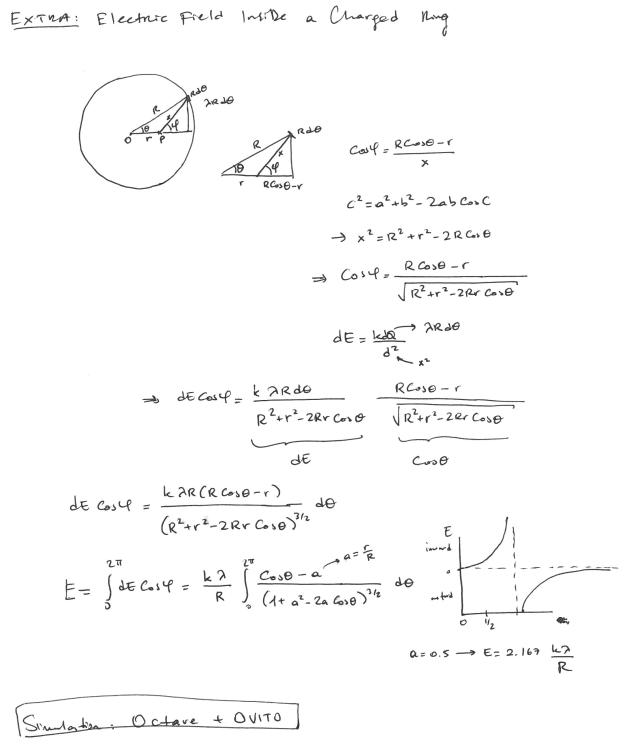

anlatımlı çıkarımı için de bkz. [Zach Wissner-Gross / Electric field inside a charged ring](https://www.youtube.com/watch?v=BF3wEV4tWq8).

Şu halde, bu çemberin içindeki her bir yüke iki kısımdan kuvvet binecek:

1. Çemberin içindeki diğer yüklerden (bu kısmı yapmasını yukarıdan biliyoruz)
2. Çemberin ta kendisinden (bunu da şimdi yapacağız)

# Ya dışındasındır çemberin, ya da içinde yer alacaksın...
Mümkünse çemberin dışına çıkmayalım (çünkü o vakit hasbelkader kendini dışarıda bulmuş yük, arkasına bile bakmadan sonsuza kadar uzaklaşacak, simülasyonumuz da "kırılmış" olacaktır).

O karmakarışık görünen integrale bir daha bakalım (çünkü copy/paste bedava! ;):
$$a\equiv \frac{r}{R},\quad E = \frac{k\lambda}{R}\int_0^{2\pi}{\frac{\cos\theta - a}{\left(1+a^2-2a\cos\theta\right)^{3/2}}d\theta}$$

integralde sisteme dair kaç değişken var?.. 





.

..

...





sadece 1! (o da $a$, yani $r$, yani merkeze olan mesafe -- $\theta$ integral değişkeni, bizim tanımladığımız bir şey değil).

Ama analitik olarak bir çözümü yok çünkü paydası $a$'nın değerine göre bir $a=1$'de patlıyor, çembere içeriden yaklaşırken +sonsuza, dışından yaklaşırken de -sonsuza ıraksıyor. Ama dert değil, bizi ilgilendiren bölgede sayısal integralini alabiliriz:

In [125]:
import numpy as np
from scipy import integrate

def E_dt(theta):
    # a'nın dışarıda tanımlandığına güveniyoruz
    E_dt = (np.cos(theta) - a)/(1+a**2-2*a*np.cos(theta))**1.5
    return E_dt

def E_I(r,l):
    # r: konum vektörü
    a = np.linalg.norm(r)
    E_I_n,hassasiyet = integrate.quad(E_dt,0,2*np.pi)
    E_I_n *= k*l
    E_I_aci = np.arctan2(r[1],r[0])
    E_I = np.array([E_I_n*np.cos(E_I_aci),E_I_n*np.sin(E_I_aci)])
    return E_I

print(E_I([0.01,0.03],3E-10))



[1.85015504 5.55046513]


Bu noktada, aşağı yukarı her şeye sahibiz ama simülasyonlarda ve verilerle uğraşılan hemen her yerde pratiklik açısından yapılan bir şeyi yapacağız: birimleri ve değerleri algıya feda edeceğiz! (hem zaten bu savaşı ilk [$\hbar = c = m_e = \epsilon_0 = 1$ diyerek](https://en.wikipedia.org/wiki/Natural_units) parçacık fizikçilerin ta kendileri başlattı! 8P 8)

Gerçekten de, her ne kadar dikkatsizlik edersek, deneysel verilerle örtüştüreceğiz diye göbeğimizi çatlatacak bu keyfilik rahatsızlık verse de, aslında amacımız sistemlerin evrilmesini ve dengeye ulaştıklarındaki konfigürasyonları saptamak (gerçek değerleri kullanmakta ısrar ederseniz, sürekli aralıklarınızı göz önünde tutmak zorunda kalırsınız, gerçek değerler elde edeceğiz diye gerçek zaman harcamaya başlarız...).

O nedenle, buyrun "küresel tavuklara"! 8)

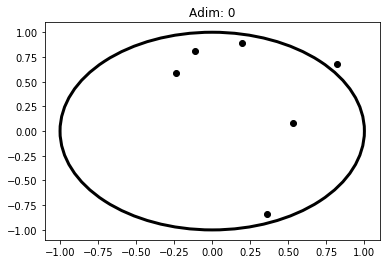

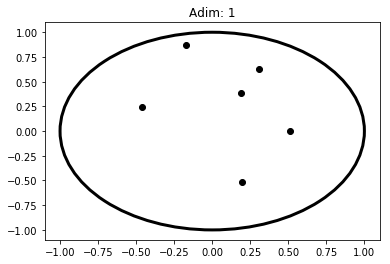

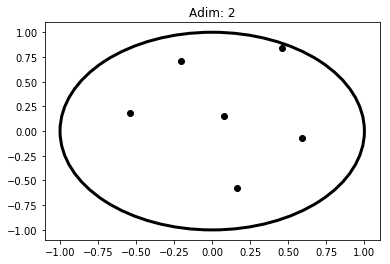

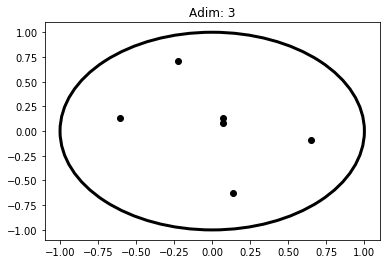

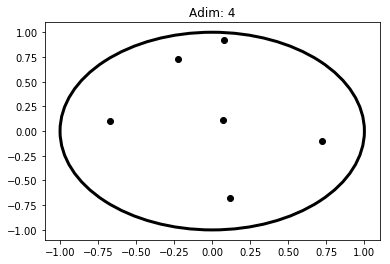

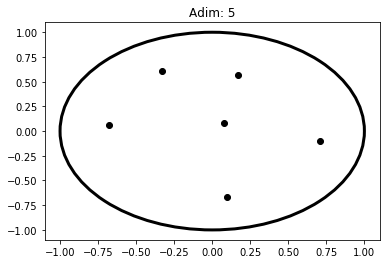

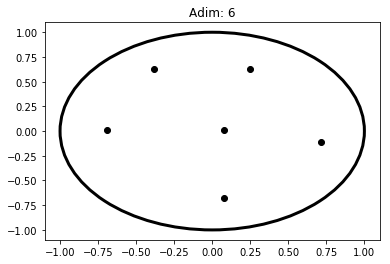

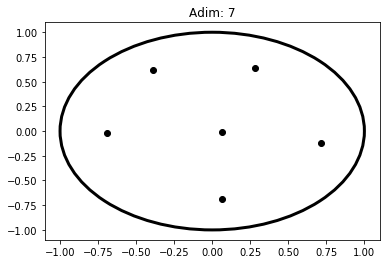

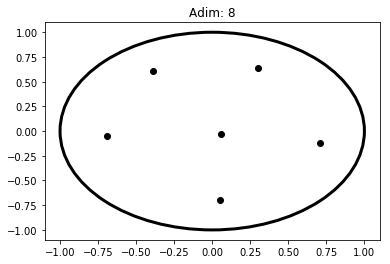

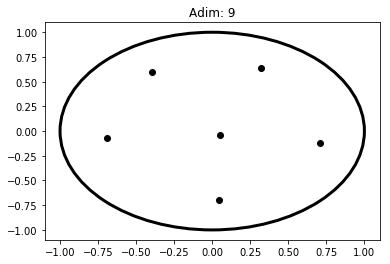

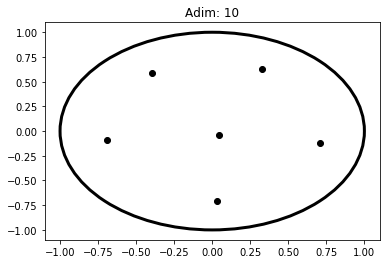

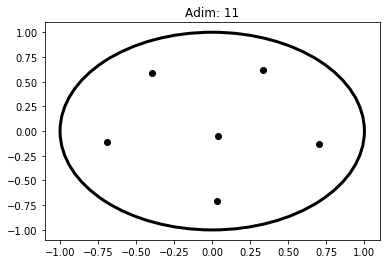

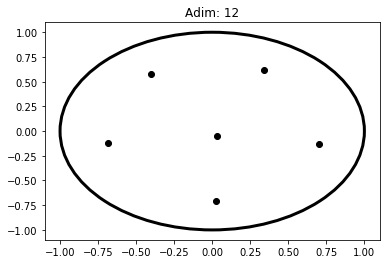

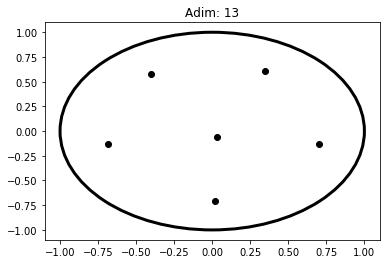

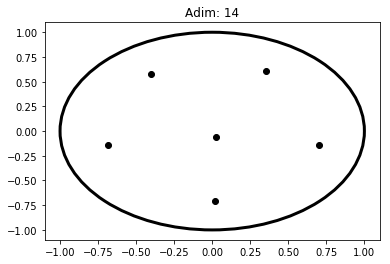

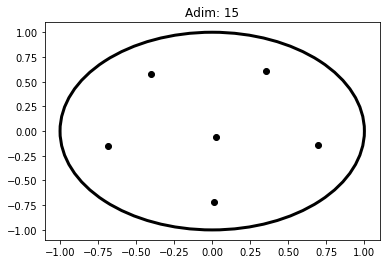

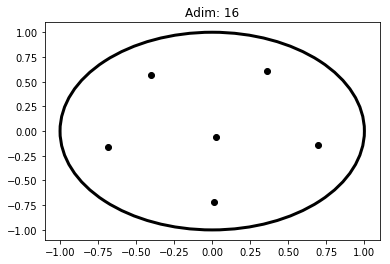

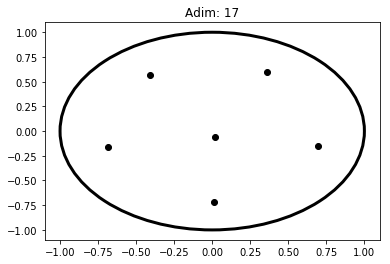

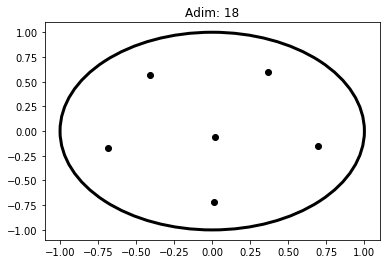

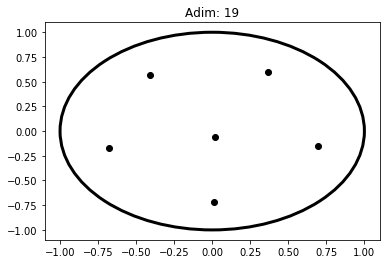

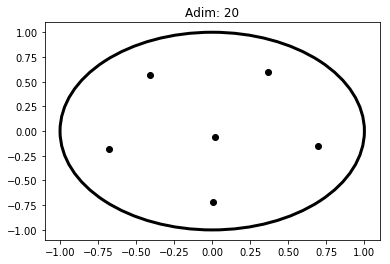

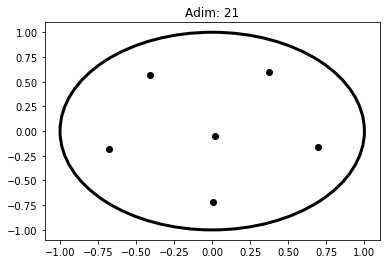

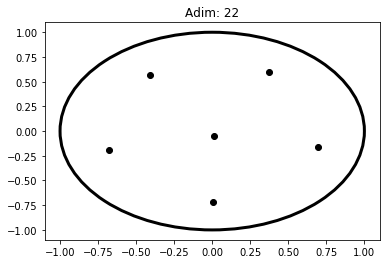

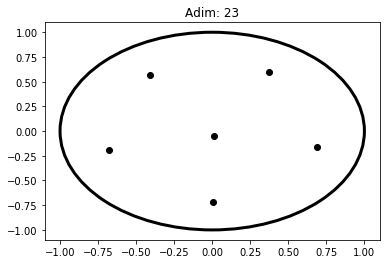

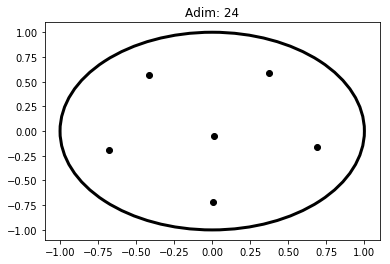

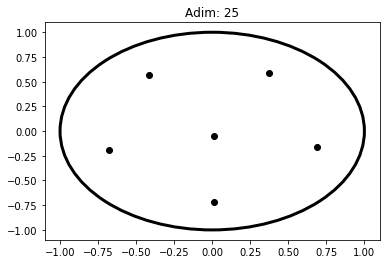

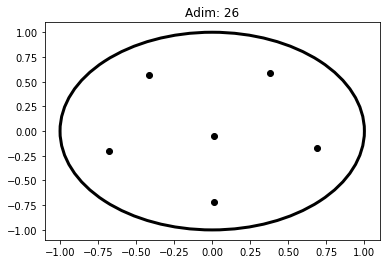

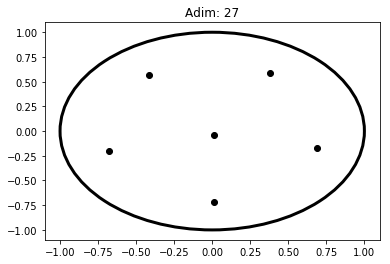

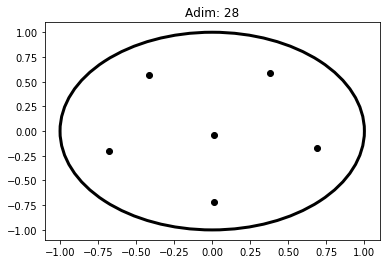

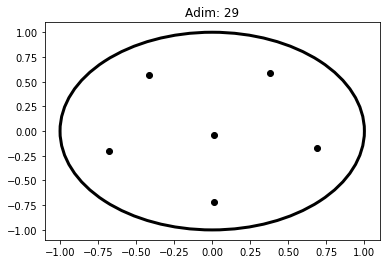

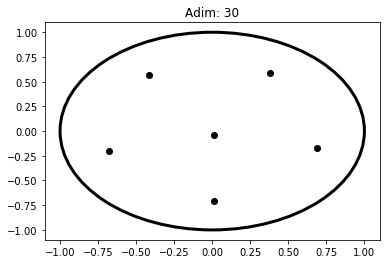

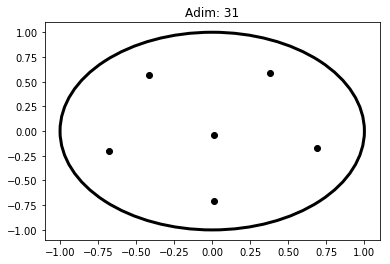

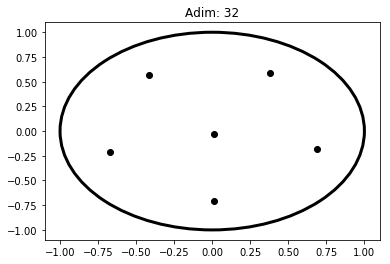

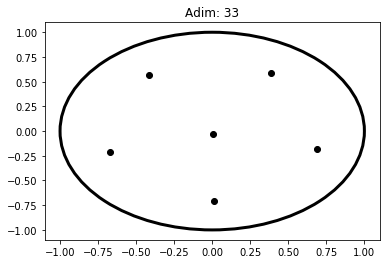

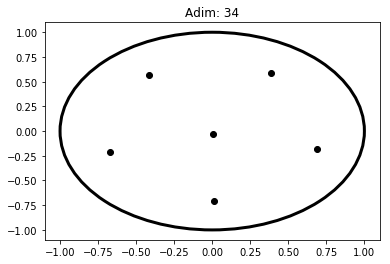

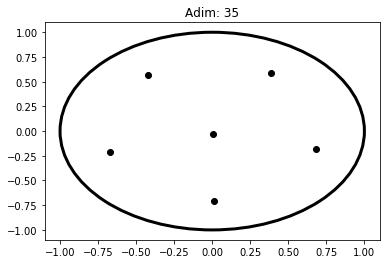

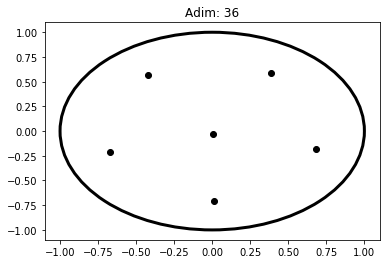

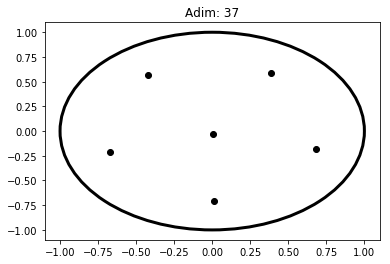

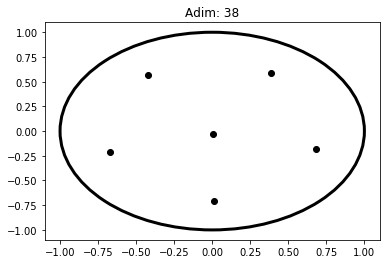

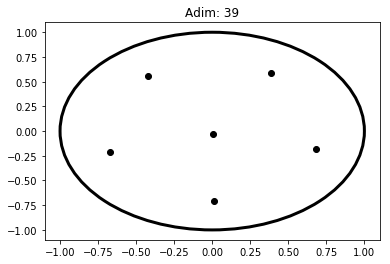

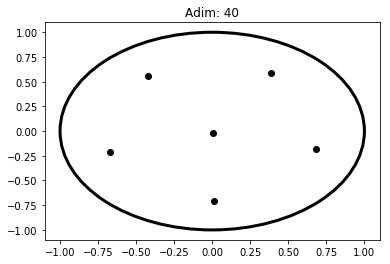

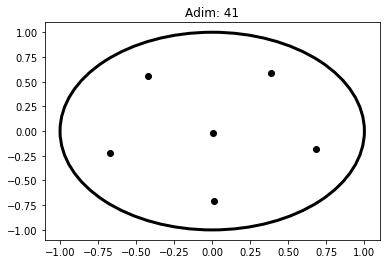

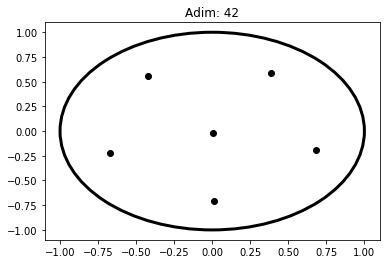

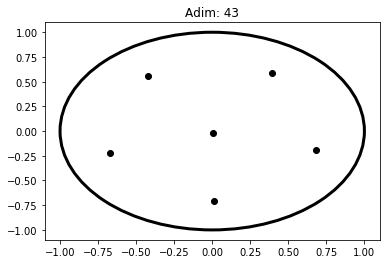

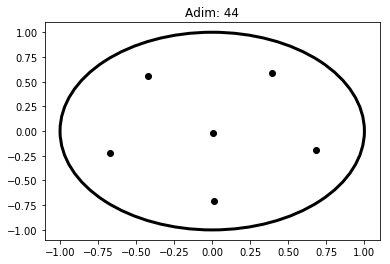

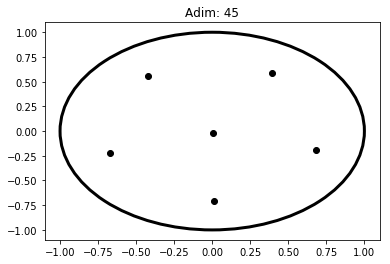

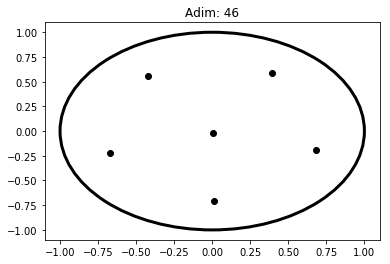

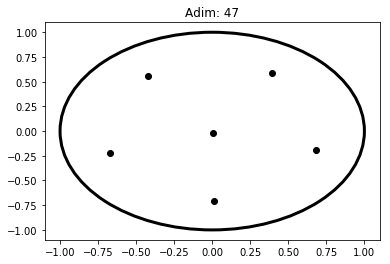

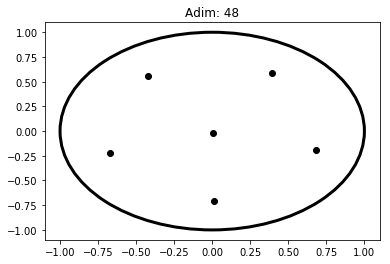

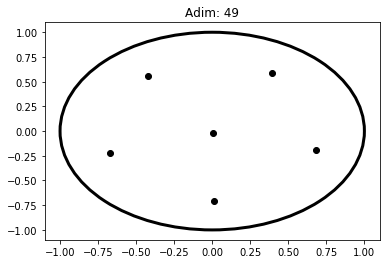

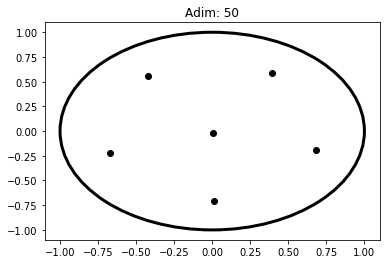

In [133]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 12 00:05:45 2020

@author: sururi
"""

# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

aa = 0

def E_dt(theta):
    # aa'nın dışarıda tanımlandığına güveniyoruz
    E_dt = (np.cos(theta) - aa)/(1+aa**2-2*aa*np.cos(theta))**1.5
    return E_dt

def E_I(r,l):
    global aa
    # r: konum vektörü
    aa = np.linalg.norm(r)
    E_I_n,hassasiyet = integrate.quad(E_dt,0,2*np.pi)
    E_I_n *= k*l
    E_I_aci = np.arctan2(r[1],r[0])
    E_I = np.array([E_I_n*np.cos(E_I_aci),E_I_n*np.sin(E_I_aci)])
    return E_I


N = 50 # Simülasyonun toplam adım sayısı

k = 1 # Nm^2/C^2 
l = 1 # yük yoğunluğu (C/m)
m = 1 # kg (kütleleri 1 alalım)
Delta_t = 0.2 # zaman aralığı (s)

# Konum hesabında her seferinde karesini hesaplamamak için
# ayrı bir değişken olarak tanımlıyoruz
Delta_t_kare = Delta_t**2 # s^2
Delta_t_kare_yarim = Delta_t**2*0.5 # s^2

q = np.array([3,2,1,-4]) # Yükleri burada tutuyoruz (C)

r = np.array([[1,5],[7,1],[3,3],[0,0]])*0.1 # Konumlar da burada (m)

r = np.random.rand(6,2)*2-1
P = r.shape[0] # Parçacık sayısı -- satır sayısından buluyoruz
q = np.ones((P,1)) # Bütün yükler 1 C olsun



# Her adımda parçacıkların konumlarını 
# konumlar değişkeninde tutacağız.
# konumlar[adım#,parçacık#,{x,y}]
# Örneğin: konumlar(5,1,0) : 2. parçacağın 5. adımdaki x konumu
konumlar = np.zeros((N+1,P,2))
konumlar[0,:] = r
ivmeler_toplam = np.zeros(N)

for adim in range(N):
    ivmeler = np.zeros((P,2))
    for i in range(P):
        for j in range(i+1,P):
            r_ij = r[j,:]-r[i,:]
            r_n = np.linalg.norm(r_ij) # m
            
            F_n = (k*q[i]*q[j]/r_n**2) # N
            aci = np.arctan2(r_ij[1],r_ij[0]) # radyan
            F_x = F_n*np.cos(aci)
            F_y = F_n*np.sin(aci)
            F = np.array([F_x[0],F_y[0]])

            a = F/m # m/s^2
            # ilgili parçacığın `ivmeler` matrisine ivmesini yazalım
            ivmeler[j,:] += a
            
            # Diğer parçacık da nasibini zıt yönde alacak
            ivmeler[i,:] -= a

        # Şimdi de çemberin i. parçacık üzerinde oluşturduğu kuvvet var:
        a_cember = E_I(r[i,:], l)
        ivmeler[i,:] -= a_cember 

    # Bu adımdaki her bir parçacığın üzerine binen kuvvetleri/ivmeleri 
    # hesapladığımıza göre, şimdi aldıkları yolları bulalım:
    
    # (sonuçta bütün ivme değerlerini 0.5*t^2 ile çarpıyoruz)
    Deltalar = ivmeler*Delta_t_kare_yarim
    
    # Deltalar'ı doğrudan r'lere ekleyebiliriz:
    r += Deltalar
    
    # Çemberin dışına kaçanları rastgele olarak içeriye koyalım
    r[np.abs(r)>1]=np.random.rand(np.sum(np.abs(r)>1))
    
    konumlar[adim+1,:] = r
    ivmeler_toplam[adim] = np.sum(np.linalg.norm(ivmeler,axis=1))
    
    # ileri seviye ------------------------------------------0---#
    if(np.linalg.norm(konumlar[adim+1,:]-konumlar[adim,:])<1E-5):
        N = adim
        break
    # ileri seviye ------------------------------------------1---#

#print(konumlar)

x_min = np.min(konumlar[:,:,0])
x_max = np.max(konumlar[:,:,0])
y_min = np.min(konumlar[:,:,1])
y_max = np.max(konumlar[:,:,1])

x_min = y_min = -1
x_max = y_max = 1


for adim in range(N+1):
    fig,ax = plt.subplots()
    plt.plot(konumlar[adim,:,0],konumlar[adim,:,1],"ok")

    plt.xlim(x_min-0.1,x_max+0.1)
    plt.ylim(y_min-0.1,y_max+0.1)
    plt.title("Adim: {:d}".format(adim))
    circle=plt.Circle((0,0), radius=1,fill=False,linewidth=3)
    ax.add_artist(circle)
    plt.show()

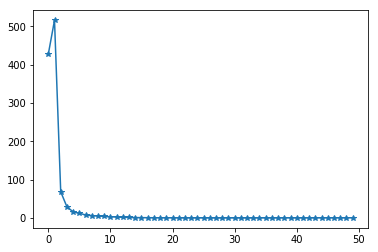

In [132]:
plt.plot(ivmeler_toplam,"*-")
plt.show()

# Pek de söylenmeyenler
Bu şekilde tepeden aşağı gidince her şey günlük güneşlik görünse de, aklımızdan çıkarmamalıyız ki, aslında çok çok çok basitleştirilmiş bir yaklaşımla yaptık hesaplarımızı. İhmal ettiğimiz en önemli şeylerden biri... doğru tahmin ettiniz, sıcaklık faktörü idi. Moleküler dinamik benzetimleri yaptığımızda, elektriksel etkileşimlerin yanı sıra, atomik etkileşimleri ve ortamdaki sıcaklığın etkisini de göz önüne alırız. Sıcaklık dediğimiz şey, parçacıkların kinetik enerjilerinin bir ürünü olduğundan, parçacıkların kinetik enerjilerini (bir başka deyişle hızlarını) istatistiki ortalamalar üzerinden ortamın sıcaklığını verecek şekilde dağıtır, ayarlarız: örneğin, ideal gaz yaklaşımı uyguluyorsak $<KE>=\frac{3}{2}k_B T$ denkleminden faydalanırız; dağımı yapmak için de, klasik dünyaya yakınsak, bu iş için en güzel/şık ve hızlı yollardan biri de Maxwell-Boltzmann dağılımını kullanmaktır). 

Hızlar işin içine girince, bakalım denklemlerimiz nasıl oluyor:

O sırada bulunduğumuz $t_0$ anından, $t_0 + \Delta t$ anına geçmek istersek:

$$v(t_0+\Delta t) = v(t_0) +  a(t_0)\,\Delta t\quad(1)\\
x(t_0+\Delta t) = x(t_0) +  v(t_0)\,\Delta t + \frac{1}{2} a(t_0)\,\Delta t^2\quad(2)$$

$x(t_0+\Delta t)$'ı Taylor açılımından da yazarsak:
$$x(t_0+\Delta t) = x(t_0) + \Delta t\,\underbrace{ v(t_0)}_{\frac{dx}{dt}|_{t_0}}+\frac{1}{2!}\Delta t^2\underbrace{ a(t_0)}_{\frac{d^2x}{dt^2}|_{t_0}}+O(\Delta t^3)\quad(3)$$

$(3) - (2)$ bize 3. dereceden hata olduğunu gösteriyor: $O(\Delta t^3)$

## Verlet algoritması
Bir de şu açılıma bakalım:
$$x(t_0+\Delta t) = x(t_0) + \Delta t\, v(t_0)+\frac{1}{2!}\Delta t^2\, a(t_0)+\frac{1}{3!}\Delta t^3\,\frac{d^3x}{dt^3}|_{t_0}+O(\Delta t^4)\\
x(t_0-\Delta t) = x(t_0) - \Delta t\, v(t_0)+\frac{1}{2!}\Delta t^2\, a(t_0)-\frac{1}{3!}\Delta t^3\,\frac{d^3x}{dt^3}|_{t_0}+O(\Delta t^4)$$

Bu iki denklemi üst üste topladığımızda:
$$x(t_0+\Delta t) = 2 x(t_0)-x(t_0-\Delta t)+\Delta t^2\,a(t_0)+O(\Delta t^4)$$

şeklinde biraz daha geniş ve hata oranı bir mertebe daha düşük bir denkleme sahip oluyoruz. Bu yaklaşıma Verlet algoritması denmekte olup, moleküler dinamik simülasyonlarında çok yoğunlukla kullanılır ("sıçrayan kurbağa" tekniği ile birlikte ;)

Herhangi bir anda hızı bilmek istediğimizde de yapmamız gereken:

$$v(t_0)=\frac{x(t_0+\Delta t)-x(t_0 - \Delta t)}{2\Delta t}+O(\Delta t^2)$$

## Parçacıklar yüklü değilse, ya da üstüne başka bir şeyse?
Simülasyonumuzda yüklü parçacıkları Coulomb yasası ile etkileştirdik. Peki, parçacıklarımız sadece yüklü parçacık değilse? Ya da yüklü parçacıklarsa ama başka türden etkileşimleri de varsa? İşte bu tür daha genel etkileşimleri çeşitli potansiyellerle modelleriz: bazısı teoriden çıkar, bazısı deneysel verilerden, bazısı da ikisinin birleşiminden. Etkileşimler kuvvetlerin uygulanması sonucu doğar, evet, ama kuvvetler vektörel büyüklükler olduklarından birden fazla bileşenle uğraşıp durmak bizi de, CPU'yu da yorar. O yüzden kuvvetler yerine, potansiyelleri kullanmak bize büyük avantaj sağlar (potansiyeller skaler olduğundan dünya pespembe olur; hem de ihtiyaç duyduğumuz anda potansiyelin gradyenini alıp, o noktadaki kuvveti de elde edebiliriz, ne de olsa: $\vec{F} = - \nabla V$). Atomik ve moleküler etkileşimleri modellemekte yaygın olarak kullanılan potansiyellerden biri de Lennard-Jones potansiyeli olup, şu formdadır:

$$V_\text{LJ} = 4\varepsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right] = \varepsilon \left[ \left(\frac{r_\text{m}}{r}\right)^{12} - 2\left(\frac{r_\text{m}}{r}\right)^6 \right]$$

Bu fonksiyonu çizdirecek olursak:
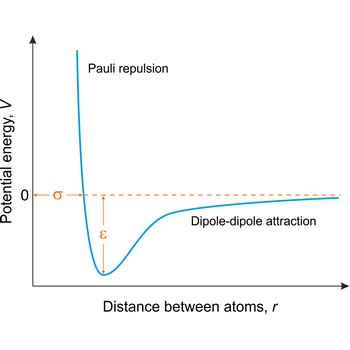
[Kaynak](https://glossary.periodni.com/glossary.php?en=Lennard-Jones+potential)

Grafikten de görüleceği üzere, belli bir mesafeye ($\sigma$) kadar atomlar birbirlerini çekiyorlar ama bu aradaki uzaklık bu mesafeden daha az olduğunda, giderek şiddetlenen bir şekilde birbirlerini itiyorlar. $\varepsilon$ değeri minimum enerji değerini belirlerken, $r_\text{m}$ değeri de denge uzaklığını vermektedir.

# Ödev değil ama canınız çok sıkılırsa yapacak bir şey bulamazsanız filan...

1. Başlangıçtaki, iki parçacıklı örneğimizi hatırlayın: Bunların yükleri aynı işaretli olduğunda birbirlerini ittiklerinden sonsuza değin birbirlerinden uzaklaşıyorlar; zıt işaretli olduklarında ise birbirlerinin dibine girip, mesafeyi giderek küçültüp, integrali de patlatıyorlardı.  
Lennard-Jones potansiyelinden esinlenip, şöyle bir cinlik/gıcıklık (artık kimin açısından baktığınıza bağlı -- ben yüklerin yerinde olsam hakikaten gıcık olurdum 8P) yapmaya çalışalım:  
Yükler birbirlerinden bir $r_\text{m}$ mesafesinden uzaktayken 1. yük işaretini (-) yapsın, aralarındaki mesafe $r_\text{m}$'e ulaştığında ise bu sefer işaretini (+)'ya çevirsin (2. yükün işaretini hep (+) olarak alalım). $|q_1| =|q_2|=1$ alın, keza $m,k,\dots$ ne varsa onlar da 1 olsun, $\Delta t=1$ için göze güzel gelen, patlamayan cortlamayan bir $r\text{m}$ değeri bulmaya uğraşın, üstüne bir de bu salınıcıların frekansını hesaplayabilirseniz aslannnn! olduğunuzun tescilidir!

2. Hatırlarsanız, işin içine çember girdikten sonra "bana bu sistemi, evrensel sabitleri, vs. para ile mi verdiler! Ne diye gerçek hayattaki değerleri tutturacağım diye bir yanda $\mu C$larla, diğer yanda metrelerle uğraşacağım!" diye krize girip, elime ne geçtiyse 1'ledim ("benim için bu problemde aslolan nicelik değil, nitelik -- 4 parçacığın dairesel bir sınıra rağmen kare yaptığını görmek istiyorum, karenin kenarları ha 4 birim olmuş ha 4.2347 birim, umrumda değil!" diyerek). E madem bu kadar özgür takılıyoruz, o zaman yüklü çemberin itici etkisini integral kasa kasa yapmak yerine, merkezde çekici bir yükün etkisiyle temsil etsem olmaz mı? Sonuçta herhangi bir noktadaki elektriksel kuvvet orada bulunan yükü merkez yönüne itiyor, aynı işi merkezde durup, ilgili arkadaşı kendine doğru çekse farkı fark edebilir miyim? Düşünün, modelleyin, yorumlayın bakalım.  
Tabii, siz de haklısınız, bu felsefi tartışmayı net bir soru/görev ile pekiştirmek gerekiyor:  
Bütün serbest yükler 1, çemberin yük dağılımı da 1, diğer arkadaşlar (m,R,k,...) 1 olsun. Çemberin oluşturacağı etkiyi merkeze koyacağım bir -Q yükü ile karşılayabilir miyiz? Karşılayamazsak nerede farklılık olur, karşılayabiliyorsak, nicelik olarak da aynı etki olması için Q yükünün büyüklüğü kaç olmalıdır?

# Son söz
Sevgili arkadaşlar, ilk defa olarak bu dönem vermiş olduğum bu dersi COVID-19'den ötürü uzaktan eğitim yoluyla, epey ilginç zamanlarda yaptık. Cuma günleri yaptığımız seanslarımıza yetiştirebileyim diye, sanırım son iki seans öncesi hariç, her perşembe gecesi sabahladım (sonuçta dersi sınıfta elimdeki karalama notlarından improvizasyonla _on-the-fly_ yapmak başka; gösterecek, elde kalacak notlar hazırlayıp, onlar üzerinden anlatmak bambaşka...) Ama o kadar yorgunluğa değdi, bu sayede tarihe ders notlarımla ufak da olsa bir not düşmüş oldum. Bildiğiniz üzere bu notları GPL lisansı ile [github üzerinden paylaşıyorum](https://emresururi.github.io/FIZ220/).

1\. dönemki "FİZ219 - Bilgisayar Programlama" dersimizde, programlamaya dair hiçbir şey bilmeyen arkadaşlar olabileceğini düşünüp, mühendislikte çok kullanılan GNU Octave ile programlamaya adım attık. Amacım bir yandan programlamanın temellerini öğretmeye çalışmak, bir yandan da mümkün olduğunca hızlı bir şekilde öğrendiklerinizi fizik ve diğer işlerinizde uygulamaya koymanızı sağlamaktı: bu sayede programlama bilgisinin hayatınızı nasıl da kolaylaştırdığınızı fark edip, rutin, geçilmesi gereken bir ders olarak görmeyip, ilgiyle öğrenmeye devam edecektiniz (o dersin 4. haftadan itibaren olan notlarını da yine [github üzerinden paylaştım](https://emresururi.github.io/FIZ219/)). 

Bu dönem daha genel bir dil olan Python'ı anlatmaya çalıştım. Sizlerin de, Python'ın da potansiyeli sonsuz: ihtiyacınız olan hemen her işi yapmak üzere bir kütüphane ya da modül büyük ihtimalle vardır; eğer işinizi görecek bir kütüphane bulamayacak seviyeye gelmişseniz, büyük ihtimalle o kütüphaneyi yazacak seviyeye de gelmişsiniz demektir. Burada size tavsiyem ne üretirseniz, açık kaynak, özgür yazılım çatısı altında paylaşın. Newton'ın da dediği üzere "devlerin sırtında yükseliyoruz!" (bir de "hayat paylaştıkça güzel" var bu minvalde: konuyla ilgili olarak bütün Ertem Eğilmez filmlerini tavsiye ederim tabii ki ama onları zaten biliyorsunuzdur; ben bir başka güzellik olarak [Halit Kıvanç'ın "Mikrofonda Halit Kıvanç" podcastlerine](https://www.ntvradyo.com.tr/PodcastDetay/2025/sjuqs9yp/mikrofonda-halit-kivanc) işaret edeceğim. 8)

Sağlıcakla kalın, ömür boyu başarı dileklerimle!  
EST

----------------------
Dersi almayıp, hatta öğrenci bile olmayıp, bir şekilde beni ve bu notları github'da bulan arkadaşlar: umarım bir nebze de olsa bu notlar işinize yaramıştır, sizler daha da iyisini, faydalısını, kolay anlatımlısını yazmayı hedefleyin!